In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from utils_vts import *
from collections import OrderedDict
import time

In [2]:
# Parameters for run-time
#max_iter = 100
#runs = 100

max_iter = 500
runs = 800

# Parameters for underlying MAB model
exp_num = 1
mu_gt = np.array([[0.1, 0.2, 0.5, 0.1, 0.5],
                  [0.2, 0.4, 0.6, 0.3, 0.8],
                  [0.3, 0.6, 0.7, 0.4, 0.9]])
sigma_gt = np.ones(mu_gt.shape)
pi_gt = np.array([[0.1, 0.2, 1/3, 0.6, 0.25],
                  [0.8, 0.6, 1/3, 0.2, 0.25],
                  [0.1, 0.2, 1/3, 0.2, 0.50]])
tau_max = 20

In [3]:
N = 9
update_frequency = 20

# Parameters for storing regret for each strategy
avg_cumm_regret = OrderedDict()

In [7]:
network_types = ['cycle', '5regular', 'grid', 'complete']
#network_types = ['complete']
#network_types = ['cycle']

approximate_time_per_VTS = 0.006506582552790642
print(f'Estimated time: {approximate_time_per_VTS*max_iter*runs:.2f} seconds')
print(f'Estimated time: {approximate_time_per_VTS*max_iter*runs/60:.2f} minutes')
print(f'Estimated time: {approximate_time_per_VTS*max_iter*runs/3600:.2f} hours')

start_time = time.time()
for network_type in network_types:
    W = compute_W(N, type=network_type)
    experiment_label = f'vts_N{N}_{network_type}'
    avg_cumm_regret[experiment_label] = run_MultiAgent_VTS_parallel(max_iter, runs, W, mu_gt, sigma_gt, pi_gt, exp_num, tau_max=tau_max, update_frequency=update_frequency, type_W=network_type, save = True, rerun=False)
    #avg_cumm_regret[experiment_label] = run_MultiAgent_VTS(max_iter, runs, W, mu_gt, sigma_gt, pi_gt, exp_num, tau_max=tau_max, update_frequency=update_frequency, type_W ='cycle', save = True, rerun=True)
end_time = time.time()
print(f'Execution time: {end_time - start_time:.2f} seconds')
print(f'Execution time: {(end_time - start_time)/60:.2f} minutes')
print(f'Execution time: {(end_time - start_time)/3600:.2f} hours')

print(f'Execution time per VTS: {(end_time - start_time)/(max_iter*runs)} seconds')


Estimated time: 2602.63 seconds
Estimated time: 43.38 minutes
Estimated time: 0.72 hours
Saved file was loaded
Saved file was loaded
Saved file was loaded
Saved file was loaded
Execution time: 0.00 seconds
Execution time: 0.00 minutes
Execution time: 0.00 hours
Execution time per VTS: 4.720687866210938e-09 seconds


In [8]:
print(f'Execution time per VTS: {(end_time - start_time)/(max_iter*runs)}')

Execution time per VTS: 4.720687866210938e-09


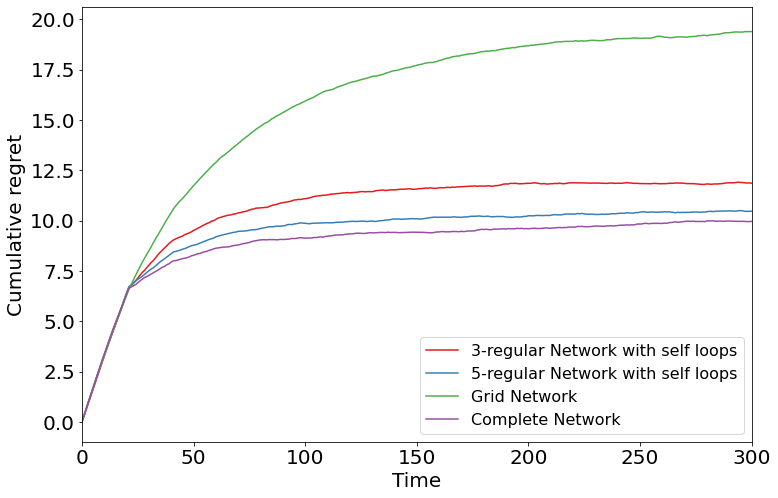

In [14]:
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
network_types = ['cycle', '5regular', 'grid', 'complete']
label_list = ['3-regular Network with self loops', '5-regular Network with self loops', 'Grid Network', 'Complete Network']
plt.figure(figsize=(12,8))
plt.xlabel("Time", fontsize=20)
plt.ylabel(r"Cumulative regret", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 300])
plot_list = []

for i, network_type, curr_color in zip([0,1,2,3], network_types, colors):
    experiment_label = f'vts_N{N}_{network_type}'
    curr_plot, = plt.plot(avg_cumm_regret[experiment_label], color=curr_color, label = label_list[i])
    plot_list.append(curr_plot)
    
filename = 'results_T{}_multiAgent_GaussianMixtureExp{}_NetworkTopology.pdf'.format(max_iter, exp_num)
plt.legend(handles=plot_list, loc='lower right', fontsize=16)
plt.savefig(filename, bbox_inches='tight')
plt.show()
